In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
import os
from numba import jit

def plot_assigned_works_dist(df):
    woker_count = df.groupby('AnnotatorID').SampleID.count()
    worker_counter = Counter(woker_count)

    plt.figure(figsize=(16,8))
    plt.bar(worker_counter.keys(), worker_counter.values())
    plt.title("Workers' assigned sample number distribuition")
    plt.show()
    
def plot_sample_workers_dist(df):
    sample_count = df.groupby('SampleID').SampleID.count()
    sample_counter = Counter(sample_count)

    plt.figure(figsize=(16,8))
    plt.bar(sample_counter.keys(), sample_counter.values())
    plt.title("Samples' annotation number distribuition")
    plt.show()
    
def devide_dataset(df, num):
    samples   = list(set(df['SampleID']))[:num]
    test_set  = df[df.apply(lambda line: line['SampleID'] in samples, axis=1)]
    rest      = df[df.apply(lambda line: line['SampleID'] not in samples, axis=1)]
    workers   = set(test_set['AnnotatorID'])
    train_set = rest[rest.apply(lambda line: line['AnnotatorID'] in workers, axis=1)]
    return train_set, test_set

In [2]:
age_groundtruth = pd.read_csv(os.path.join('../input', 'age_groundtruth.csv'), sep=';')
age_annotations = pd.read_csv(os.path.join('../input', 'age_annotations.csv'), sep=';')
age_annotations_set1 = pd.read_csv(os.path.join('../input', 'age_annotations_set1.csv'), sep=';')
age_annotations_set2 = pd.read_csv(os.path.join('../input', 'age_annotations_set2.csv'), sep=';')

In [3]:
train, test = devide_dataset(age_annotations, 100)

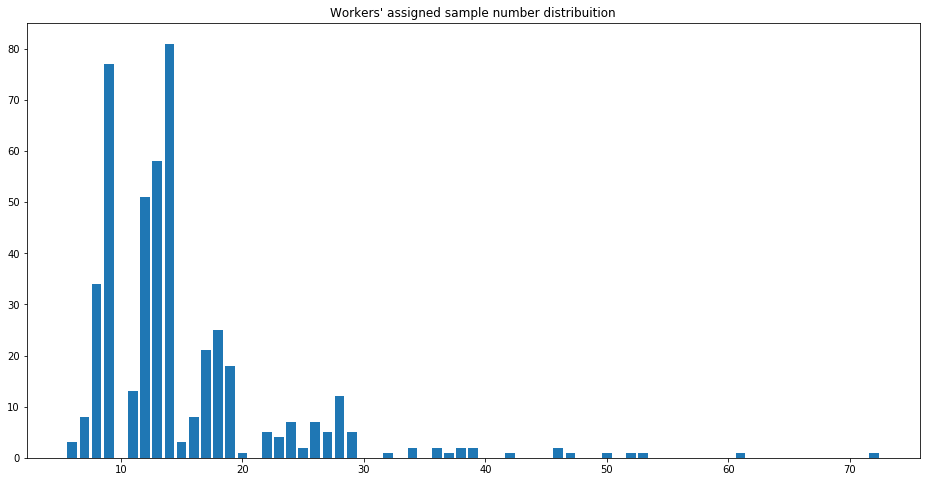

In [4]:
plot_assigned_works_dist(train)

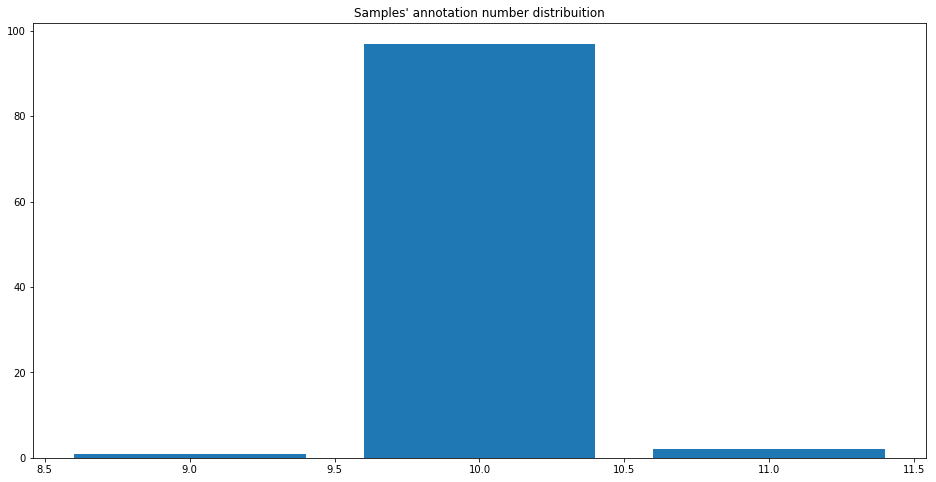

In [5]:
plot_sample_workers_dist(test)

In [6]:
print(f'there are {len(set(train["AnnotatorID"]))} workers in train set, {len(set(test["AnnotatorID"]))} workers in test set')
print(f'there are {len(set(train["SampleID"]))} samples in train set, {len(set(test["SampleID"]))} samples in test set')

there are 467 workers in train set, 467 workers in test set
there are 902 samples in train set, 100 samples in test set
